# Weather AUS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Data Science/ML practice/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.shape

(145460, 23)

In [55]:
df.MinTemp=df.MinTemp.fillna(method='ffill')

In [56]:
df.MaxTemp=df.MaxTemp.fillna(method='bfill')

In [110]:
#df.fillna(df.mean(),inplace=True)
#df2.fillna(df2.mean(), inplace=True)

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              1
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [57]:
df['Humidity']=df[['Humidity9am','Humidity3pm']].mean(axis=1)

In [58]:
df['Cloud']=df[['Cloud9am','Cloud3pm']].mean(axis=1)

In [59]:
df['Pressure']=df[['Pressure9am','Pressure3pm']].mean(axis=1)

In [60]:
df['Temp']=df[['Temp9am','Temp3pm']].mean(axis=1)

In [61]:
df['WindSpeed']=df[['WindSpeed9am','WindSpeed3pm']].mean(axis=1)

In [62]:
X=df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed','Humidity','Pressure','Cloud','Temp','RainToday']]
Y=df['RainTomorrow']

In [63]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,13.4,22.9,0.6,NaN,NaN,44.0,22.0,46.5,1007.40,8.0,19.35,No
1,7.4,25.1,0.0,NaN,NaN,44.0,13.0,34.5,1009.20,NaN,20.75,No
2,12.9,25.7,0.0,NaN,NaN,46.0,22.5,34.0,1008.15,2.0,22.10,No
3,9.2,28.0,0.0,NaN,NaN,24.0,10.0,30.5,1015.20,NaN,22.30,No
4,17.5,32.3,1.0,NaN,NaN,41.0,13.5,57.5,1008.40,7.5,23.75,No


In [65]:
Y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [16]:
X.isnull().sum()

MinTemp               0
MaxTemp               1
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustSpeed     10263
WindSpeed        145460
Humidity           1887
Pressure         145460
Cloud            145460
Temp             145460
RainToday          3261
dtype: int64

In [17]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,145460.000000,145459.000000,142199.000000,82670.000000,75625.000000,135197.000000,0.0,143573.000000,0.0,0.0,0.0
mean,12.212171,23.201306,2.360918,5.468232,7.611178,40.035230,NaN,60.376505,NaN,NaN,NaN
std,6.395051,7.117128,8.478060,4.193704,3.785483,13.607062,NaN,18.260268,NaN,NaN,NaN
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,NaN,0.000000,NaN,NaN,NaN
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,NaN,49.000000,NaN,NaN,NaN
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,NaN,61.500000,NaN,NaN,NaN
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,NaN,73.500000,NaN,NaN,NaN
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,NaN,100.000000,NaN,NaN,NaN


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145459 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed      0 non-null       float64
 7   Humidity       143573 non-null  float64
 8   Pressure       0 non-null       float64
 9   Cloud          0 non-null       float64
 10  Temp           0 non-null       float64
 11  RainToday      142199 non-null  object 
dtypes: float64(11), object(1)
memory usage: 13.3+ MB


In [66]:
X=pd.get_dummies(X)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,22.0,46.5,1007.40,8.0,19.35,True,False
1,7.4,25.1,0.0,NaN,NaN,44.0,13.0,34.5,1009.20,NaN,20.75,True,False
2,12.9,25.7,0.0,NaN,NaN,46.0,22.5,34.0,1008.15,2.0,22.10,True,False
3,9.2,28.0,0.0,NaN,NaN,24.0,10.0,30.5,1015.20,NaN,22.30,True,False
4,17.5,32.3,1.0,NaN,NaN,41.0,13.5,57.5,1008.40,7.5,23.75,True,False


In [43]:
X.isnull().sum()

MinTemp              0
MaxTemp              1
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed         1213
Humidity          1887
Pressure         14804
Cloud            51744
Temp              1129
RainToday_No         0
RainToday_Yes        0
dtype: int64

In [67]:
X.fillna(X.mean(),inplace=True)

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_new=imputer.fit_transform(X)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed      0 non-null       float64
 7   Humidity       145460 non-null  float64
 8   Pressure       0 non-null       float64
 9   Cloud          0 non-null       float64
 10  Temp           0 non-null       float64
 11  RainToday_No   145460 non-null  bool   
 12  RainToday_Yes  145460 non-null  bool   
dtypes: bool(2), float64(11)
memory usage: 12.5 MB


In [69]:
X.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed        0
Humidity         0
Pressure         0
Cloud            0
Temp             0
RainToday_No     0
RainToday_Yes    0
dtype: int64

In [70]:
Y.isnull().sum()

3267

In [51]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
Y=label.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [72]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.81704019 0.82451075 0.82056923 0.81901095 0.81433613]
0.8190934506622668


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


[0.80956964 0.8124112  0.81259453 0.81135707 0.81204455]
0.8115953985058895


In [75]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

KeyboardInterrupt: 

# DATA

In [30]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
purchase=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Python Scripts/ML practice/Data.csv')
purchase.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [72]:
purchase.corr()

,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


In [73]:
purchase.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [74]:
purchase.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

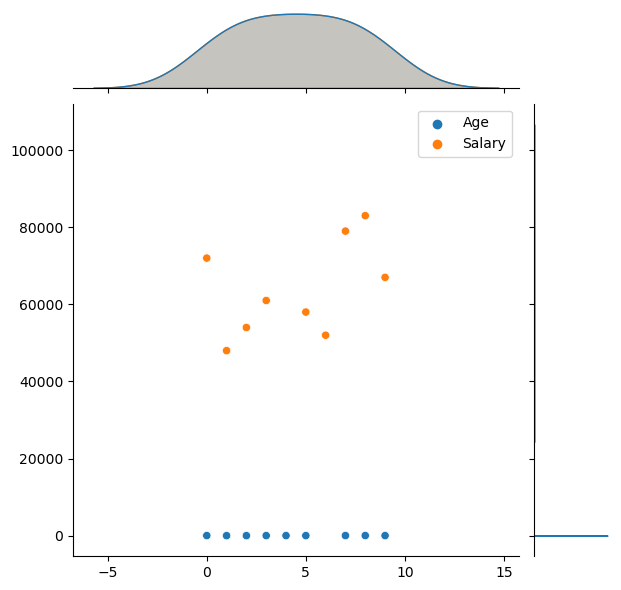

In [75]:
#EDA
sns.jointplot(purchase)

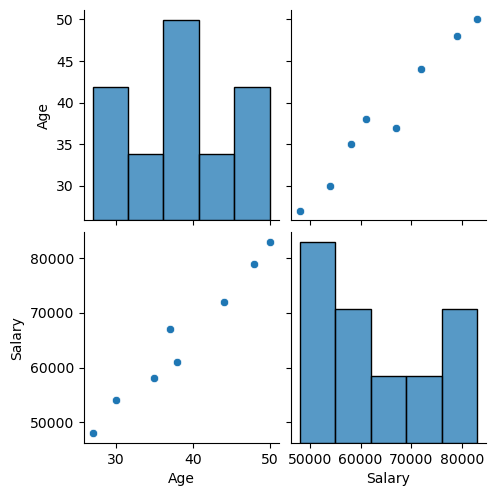

In [76]:
sns.pairplot(purchase)

<Axes: >

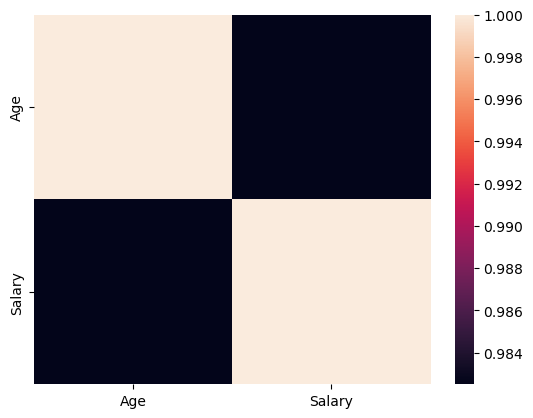

In [77]:
sns.heatmap(purchase.corr())

In [98]:
X=purchase.iloc[:,:-1]
Y=purchase['Purchased']

In [97]:
purchase.fillna(purchase.mean(), inplace=True)
purchase

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [99]:
purchase.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [100]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [101]:
X=pd.get_dummies(X)
X

,Age,Salary,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,1,0,0
1,27.000000,48000.000000,0,0,1
2,30.000000,54000.000000,0,1,0
3,38.000000,61000.000000,0,0,1
4,40.000000,63777.777778,0,1,0
5,35.000000,58000.000000,1,0,0
6,38.777778,52000.000000,0,0,1
7,48.000000,79000.000000,1,0,0
8,50.000000,83000.000000,0,1,0
9,37.000000,67000.000000,1,0,0


In [102]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 7.58874362e-01,  7.49473254e-01,  1.22474487e+00,
        -6.54653671e-01, -6.54653671e-01],
       [-1.71150388e+00, -1.43817841e+00, -8.16496581e-01,
        -6.54653671e-01,  1.52752523e+00],
       [-1.27555478e+00, -8.91265492e-01, -8.16496581e-01,
         1.52752523e+00, -6.54653671e-01],
       [-1.13023841e-01, -2.53200424e-01, -8.16496581e-01,
        -6.54653671e-01,  1.52752523e+00],
       [ 1.77608893e-01,  6.63219199e-16, -8.16496581e-01,
         1.52752523e+00, -6.54653671e-01],
       [-5.48972942e-01, -5.26656882e-01,  1.22474487e+00,
        -6.54653671e-01, -6.54653671e-01],
       [ 0.00000000e+00, -1.07356980e+00, -8.16496581e-01,
        -6.54653671e-01,  1.52752523e+00],
       [ 1.34013983e+00,  1.38753832e+00,  1.22474487e+00,
        -6.54653671e-01, -6.54653671e-01],
       [ 1.63077256e+00,  1.75214693e+00, -8.16496581e-01,
         1.52752523e+00, -6.54653671e-01],
       [-2.58340208e-01,  2.93712492e-01,  1.22474487e+00,
        -6.54653671e-01

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [105]:
Y_predict=kn.predict(X_test)
Y_predict

array([1, 1])

In [106]:
Y_test

array([0, 0])

In [95]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, Y_predict))  
print(classification_report(Y_test, Y_predict)) 

[[0 2]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

